# Tendencias en las preferencias de cerveza 
Este conjunto de datos contiene alrededor de 1,5 millones de reseñas de cervezas de [BeerAdvocates](https://www.beeradvocate.com/). Su objetivo es caracterizar el conjunto de datos, agrupar cervezas similares y poder recomendar una cerveza, que preguntas podría responder utilizando los datos, por ejemplo: si tuviera que elegir 5 cervezas para recomendar, ¿cuál elegiría? ¿Por qué? ¿Cuáles de los factores (sabor, aroma, apariencia, paladar) son más importantes para determinar la la calidad general de una cerveza? Si por lo general disfruto de las IPA, ¿qué cerveza debo probar? 

In [1]:
import pandas as pd
beer_reviews_1 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBEE/data/beer_reviews_1.csv")
beer_reviews_1.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,871901.000000,8.719010e+05,871901.000000,871901.000000,871901.000000,871901.000000,871901.000000,835659.000000,871901.000000
mean,3271.796264,1.227348e+09,3.828825,3.755972,3.856491,3.757737,3.808603,7.046130,23337.928449
std,5644.054301,7.531277e+07,0.704718,0.677216,0.597753,0.662392,0.711305,2.330143,22030.109041
min,1.000000,8.406720e+08,0.000000,1.000000,0.000000,1.000000,1.000000,0.010000,3.000000
25%,140.000000,1.179688e+09,3.500000,3.500000,3.500000,3.500000,3.500000,5.300000,2151.000000
50%,590.000000,1.243041e+09,4.000000,4.000000,4.000000,4.000000,4.000000,6.500000,17770.000000
75%,2743.000000,1.289962e+09,4.500000,4.000000,4.000000,4.000000,4.500000,8.500000,41722.000000
max,28003.000000,1.326285e+09,5.000000,5.000000,5.000000,5.000000,5.000000,57.700000,77314.000000


In [2]:
beer_reviews_2 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBEE/data/beer_reviews_2.csv")
beer_reviews_2.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,714713.000000,7.147130e+05,714713.000000,714713.000000,714713.000000,714713.000000,714713.000000,683170.000000,714713.000000
mean,2957.238473,1.220114e+09,3.799424,3.710828,3.823527,3.726578,3.773655,7.037808,19730.241690
std,5491.633209,7.783588e+07,0.739240,0.720948,0.637284,0.705274,0.755971,2.313168,21390.648054
min,4.000000,8.853408e+08,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000,10.000000
25%,147.000000,1.166726e+09,3.500000,3.500000,3.500000,3.500000,3.500000,5.200000,1381.000000
50%,367.000000,1.234357e+09,4.000000,4.000000,4.000000,4.000000,4.000000,6.500000,8984.000000
75%,1941.000000,1.286605e+09,4.500000,4.000000,4.000000,4.000000,4.500000,8.500000,36087.000000
max,27984.000000,1.326275e+09,5.000000,5.000000,5.000000,5.000000,5.000000,39.000000,77317.000000


In [3]:
beer_reviews_1.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [6]:
#Uno los 2 dataset
df= pd.concat([beer_reviews_1, beer_reviews_2], ignore_index= True)

In [7]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [8]:
df.shape


(1586614, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [10]:
nombre_cerveceria= df['brewery_name'].unique()
nombre_cerveceria.shape

(5743,)

In [11]:
id_cerveceria= df['brewery_id'].unique()
id_cerveceria.shape

(5840,)

In [12]:
estilo= df['beer_style'].unique()
estilo.shape

(104,)

In [13]:
faltantes = pd.isna(df).sum()
faltantes

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [14]:
#Elimino a las filas que le faltan datos a beer_abv, el nombre de la cervecería y el nombre de del perfil de usuario no se elimina la fila, ya que esos datos no se van a utilizar
df1= df.dropna(subset=['beer_abv'])
df1.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [ ]:
faltantes = pd.isna(df1).sum()
faltantes

brewery_id              0
brewery_name           15
review_time             0
review_overall          0
review_aroma            0
review_appearance       0
review_profilename    336
beer_style              0
review_palate           0
review_taste            0
beer_name               0
beer_abv                0
beer_beerid             0
dtype: int64

In [15]:
#Elimino las columnas que no voy a usar
df2= df1.drop(['brewery_name', 'review_profilename', 'beer_name'], axis=1)
df2

,brewery_id,review_time,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv,beer_beerid
0,10325,1234817823,1.5,2.0,2.5,Hefeweizen,1.5,1.5,5.0,47986
1,10325,1235915097,3.0,2.5,3.0,English Strong Ale,3.0,3.0,6.2,48213
2,10325,1235916604,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,6.5,48215
3,10325,1234725145,3.0,3.0,3.5,German Pilsener,2.5,3.0,5.0,47969
4,1075,1293735206,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,7.7,64883
...,...,...,...,...,...,...,...,...,...,...
1586609,14359,1162684892,5.0,4.0,3.5,Pumpkin Ale,4.0,4.0,5.2,33061
1586610,14359,1161048566,4.0,5.0,2.5,Pumpkin Ale,2.0,4.0,5.2,33061
1586611,14359,1160702513,4.5,3.5,3.0,Pumpkin Ale,3.5,4.0,5.2,33061
1586612,14359,1160023044,4.0,4.5,4.5,Pumpkin Ale,4.5,4.5,5.2,33061


In [16]:
# Transformo el beer_style en categorias por números
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df2['beer_style_id'] = LE.fit_transform(df2['beer_style'])
df2

,brewery_id,review_time,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv,beer_beerid,beer_style_id
0,10325,1234817823,1.5,2.0,2.5,Hefeweizen,1.5,1.5,5.0,47986,65
1,10325,1235915097,3.0,2.5,3.0,English Strong Ale,3.0,3.0,6.2,48213,51
2,10325,1235916604,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,6.5,48215,59
3,10325,1234725145,3.0,3.0,3.5,German Pilsener,2.5,3.0,5.0,47969,61
4,1075,1293735206,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,7.7,64883,9
...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,1162684892,5.0,4.0,3.5,Pumpkin Ale,4.0,4.0,5.2,33061,85
1586610,14359,1161048566,4.0,5.0,2.5,Pumpkin Ale,2.0,4.0,5.2,33061,85
1586611,14359,1160702513,4.5,3.5,3.0,Pumpkin Ale,3.5,4.0,5.2,33061,85
1586612,14359,1160023044,4.0,4.5,4.5,Pumpkin Ale,4.5,4.5,5.2,33061,85


In [17]:
#Elimino beer_style y review_time y review_overall
df3= df2.drop(['beer_style','review_time','review_overall', 'brewery_id', 'beer_beerid'], axis=1)
df3.head()

,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_style_id
0,2.0,2.5,1.5,1.5,5.0,65
1,2.5,3.0,3.0,3.0,6.2,51
2,2.5,3.0,3.0,3.0,6.5,59
3,3.0,3.5,2.5,3.0,5.0,61
4,4.5,4.0,4.0,4.5,7.7,9


In [18]:
#En primer instancias utilice la columna beer_style_id, pero al hacer el clustering los agrupaba a los estilos por abecedario.
#Por lo que decidí normalizar todos los valores, para que tengan un rango entre 0 y 1.
df3.review_aroma=df3.review_aroma/df3.review_aroma.max()
df3.review_appearance=df3.review_appearance/df3.review_appearance.max()
df3.review_palate=df3.review_palate/df3.review_palate.max()
df3.review_taste=df3.review_taste/df3.review_taste.max()
df3.beer_abv=df3.beer_abv/df3.beer_abv.max()
df3.beer_style_id=df3.beer_style_id/df3.beer_style_id.max()
df3.head()

,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_style_id
0,0.4,0.5,0.3,0.3,0.086655,0.631068
1,0.5,0.6,0.6,0.6,0.107452,0.495146
2,0.5,0.6,0.6,0.6,0.112652,0.572816
3,0.6,0.7,0.5,0.6,0.086655,0.592233
4,0.9,0.8,0.8,0.9,0.133449,0.087379


In [19]:
#Voy a utilizar la regla del codo para determinar la cantidad de clusters
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df3)
    Sum_of_squared_distances.append(km.inertia_)

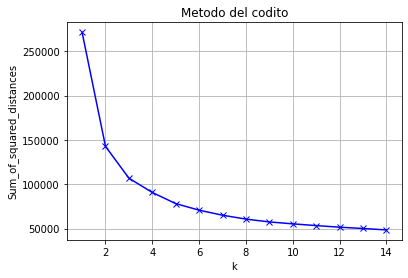

In [20]:
import matplotlib.pyplot as plt

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.grid()
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Metodo del codito')
plt.show()

In [21]:
#Elijo K=5
K=5
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import numpy as np

X= df3.to_numpy()



In [22]:
#Utlizo KMeans, con K=5. Entreno con todo el data_set
clust= KMeans(n_clusters= K , random_state=0)
clust.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [23]:
#Obtengo las categorias de cada cerverza realizando la predicción del dataset completo.
categorias =clust.predict(X)

In [24]:
df3['categoria']=categorias

df3.head()

,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_style_id,categoria
0,0.4,0.5,0.3,0.3,0.086655,0.631068,3
1,0.5,0.6,0.6,0.6,0.107452,0.495146,3
2,0.5,0.6,0.6,0.6,0.112652,0.572816,3
3,0.6,0.7,0.5,0.6,0.086655,0.592233,3
4,0.9,0.8,0.8,0.9,0.133449,0.087379,2


In [25]:
df3['categoria'].unique()

array([3, 2, 4, 1, 0], dtype=int32)

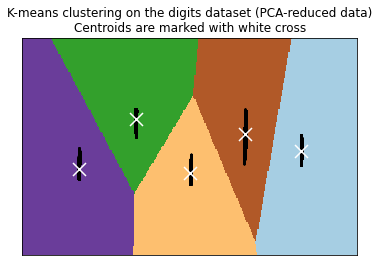

In [26]:
#Busco las 2 compenentes principales con PCA y las grafico según su categorías (Ejemplo de sklearn)
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
reduced_data = PCA(n_components=2).fit_transform(df3)
kmeans = KMeans(init='k-means++', n_clusters=K, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [27]:
#Incluyo en el dataset completo las categorias obtenidas
df1['categoria']=categorias

df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,categoria
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,3
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,3
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,3
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,3
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,2


In [28]:
#Observo los estilos de cerveza que se encuentrane en la categoria 0
A= df1[df1.categoria==0]['beer_style'].unique()
print(A, A.shape)

['American Pale Ale (APA)' 'American Porter' 'Belgian Strong Dark Ale'
 'American Amber / Red Ale' 'American Adjunct Lager' 'American Blonde Ale'
 'American IPA' 'American Double / Imperial IPA' 'American Strong Ale'
 'American Barleywine' 'American Double / Imperial Stout' 'Doppelbock'
 'American Stout' 'Dortmunder / Export Lager' 'American Pale Lager' 'Bock'
 'Altbier' 'American Amber / Red Lager' 'American Black Ale' 'Dubbel'
 'Belgian Pale Ale' 'American Brown Ale' 'Belgian Strong Pale Ale'
 'Belgian Dark Ale' 'American Pale Wheat Ale' 'Czech Pilsener' 'Cream Ale'
 'Belgian IPA' 'Black & Tan' 'English Bitter' 'American Dark Wheat Ale'
 'American Malt Liquor' 'Baltic Porter' 'Braggot' 'Bière de Garde'
 'English Brown Ale' 'English Barleywine' 'American Wild Ale' 'Chile Beer'
 'Eisbock' 'Berliner Weissbier' 'California Common / Steam Beer'
 'Dunkelweizen' 'American Double / Imperial Pilsner'
 'Bière de Champagne / Bière Brut'] (45,)


In [ ]:
#Cuantifico la cantidad de ALE, IPA, LAGER y STOUT, para determinar si hay un tipo de cerveza donimantes en el cluster.
Ale=np.core.defchararray.find(A.astype(str), 'Ale')
Ale[Ale==-1]=0
Ale[Ale>1]=1
print("Ale: ", Ale.sum())

IPA=np.core.defchararray.find(A.astype(str), 'IPA')
IPA[IPA==-1]=0
IPA[IPA>1]=1
print("IPA: ",IPA.sum())

IPA=np.core.defchararray.find(A.astype(str), 'Stout')
IPA[IPA==-1]=0
IPA[IPA>1]=1
print("Stout: ",IPA.sum())

IPA=np.core.defchararray.find(A.astype(str), 'Stout')
IPA[IPA==-1]=0
IPA[IPA>1]=1
print("Lager: ",IPA.sum())

IPA=np.core.defchararray.find(A.astype(str), 'bock')
IPA[IPA==-1]=0
IPA[IPA>1]=1
print("bock: ",IPA.sum())

Ale:  15
IPA:  3
Stout:  2
Lager:  2
bock:  2


In [29]:
#Observo los estilos de cerveza que se encuentrane en la categoria 1
B=df1[df1.categoria==1]['beer_style'].unique()
print(B, B.shape)

['Rauchbier' 'Russian Imperial Stout' 'Märzen / Oktoberfest'
 'Maibock / Helles Bock' 'Light Lager' 'Kölsch' 'Pumpkin Ale' 'Rye Beer'
 'Milk / Sweet Stout' 'Scottish Ale' 'Witbier' 'Saison / Farmhouse Ale'
 'Scotch Ale / Wee Heavy' 'Tripel' 'Smoked Beer'
 'Keller Bier / Zwickel Bier' 'Schwarzbier' 'Munich Dunkel Lager'
 'Winter Warmer' 'Oatmeal Stout' 'Irish Red Ale' 'Vienna Lager'
 'Scottish Gruit / Ancient Herbed Ale' 'Munich Helles Lager'
 'Kristalweizen' 'Old Ale' 'Quadrupel (Quad)' 'Wheatwine' 'Lambic - Fruit'
 'Weizenbock' 'Lambic - Unblended' 'Low Alcohol Beer'
 'Herbed / Spiced Beer' 'Irish Dry Stout' 'Roggenbier'
 'Japanese Rice Lager' 'Sahti' 'Kvass'] (38,)


In [30]:
#Cuantifico la cantidad de ALE, IPA, LAGER y STOUT, para determinar si hay un tipo de cerveza donimantes en el cluster.
Ale=np.core.defchararray.find(B.astype(str), 'Ale')
Ale[Ale==-1]=0
Ale[Ale>1]=1
print("Ale: ", Ale.sum())

IPA=np.core.defchararray.find(B.astype(str), 'IPA')
IPA[IPA==-1]=0
IPA[IPA>1]=1
print("IPA: ",IPA.sum())

IPA=np.core.defchararray.find(B.astype(str), 'Stout')
IPA[IPA==-1]=0
IPA[IPA>1]=1
print("Stout: ",IPA.sum())

IPA=np.core.defchararray.find(B.astype(str), 'Stout')
IPA[IPA==-1]=0
IPA[IPA>1]=1
print("Lager: ",IPA.sum())

IPA=np.core.defchararray.find(B.astype(str), 'bock')
IPA[IPA==-1]=0
IPA[IPA>1]=1
print("bock: ",IPA.sum())

Ale:  7
IPA:  0
Stout:  4
Lager:  4
bock:  2


In [ ]:
#Observo los estilos de cerveza que se encuentrane en la categoria 2
C=df1[df1.categoria==2]['beer_style'].unique()
C

array(['American Double / Imperial IPA', 'American Pale Lager',
       'American Pale Ale (APA)', 'American Porter',
       'Belgian Strong Dark Ale', 'American IPA',
       'American Amber / Red Ale', 'American Strong Ale',
       'American Adjunct Lager', 'American Blonde Ale',
       'Belgian Pale Ale', 'American Barleywine',
       'American Double / Imperial Stout', 'American Stout', 'Bock',
       'Altbier', 'American Pale Wheat Ale', 'American Amber / Red Lager',
       'American Black Ale', 'California Common / Steam Beer',
       'English Bitter', 'Belgian Strong Pale Ale', 'American Brown Ale',
       'Bière de Garde', 'Belgian Dark Ale', 'Chile Beer',
       'Czech Pilsener', 'English Barleywine', 'Belgian IPA',
       'Black & Tan', 'American Wild Ale',
       'American Double / Imperial Pilsner', 'Baltic Porter', 'Braggot',
       'American Dark Wheat Ale', 'Doppelbock', 'Eisbock', 'Dubbel',
       'Berliner Weissbier', 'American Malt Liquor', 'Cream Ale',
       'Dunkelwe

In [ ]:
#Cuantifico la cantidad de ALE, IPA, LAGER y STOUT, para determinar si hay un tipo de cerveza donimantes en el cluster.
Ale=np.core.defchararray.find(C.astype(str), 'Ale')
Ale[Ale==-1]=0
Ale[Ale>1]=1
print("Ale: ", Ale.sum())

IPA=np.core.defchararray.find(C.astype(str), 'IPA')
IPA[IPA==-1]=0
IPA[IPA>1]=1
print("IPA: ",IPA.sum())

IPA=np.core.defchararray.find(C.astype(str), 'Stout')
IPA[IPA==-1]=0
IPA[IPA>1]=1
print("Stout: ",IPA.sum())

IPA=np.core.defchararray.find(C.astype(str), 'Stout')
IPA[IPA==-1]=0
IPA[IPA>1]=1
print("Lager: ",IPA.sum())

IPA=np.core.defchararray.find(C.astype(str), 'bock')
IPA[IPA==-1]=0
IPA[IPA>1]=1
print("bock: ",IPA.sum())

Ale:  14
IPA:  3
Stout:  2
Lager:  2
bock:  2


In [ ]:
#Observo los estilos de cerveza que se encuentrane en la categoria 3
D=df1[df1.categoria==3]['beer_style'].unique()
D

array(['Hefeweizen', 'English Strong Ale', 'Foreign / Export Stout',
       'German Pilsener', 'Herbed / Spiced Beer', 'Light Lager',
       'Oatmeal Stout', 'Rauchbier', 'Euro Pale Lager',
       'Fruit / Vegetable Beer', 'English Bitter', 'Low Alcohol Beer',
       'Extra Special / Strong Bitter (ESB)', 'Euro Strong Lager',
       'Schwarzbier', 'Munich Dunkel Lager', 'Vienna Lager', 'Witbier',
       'Euro Dark Lager', 'Scotch Ale / Wee Heavy', 'Pumpkin Ale',
       'Tripel', 'Kölsch', 'Märzen / Oktoberfest', 'English Pale Ale',
       'Scottish Ale', 'English Porter', 'Keller Bier / Zwickel Bier',
       'Saison / Farmhouse Ale', 'Smoked Beer', 'Maibock / Helles Bock',
       'English Brown Ale', 'Irish Red Ale', 'Winter Warmer',
       'Russian Imperial Stout', 'Cream Ale', 'Weizenbock',
       'English Stout', 'English India Pale Ale (IPA)', 'Wheatwine',
       'Rye Beer', 'Dortmunder / Export Lager', 'Munich Helles Lager',
       'Czech Pilsener', 'Bock', 'Kristalweizen', 'Lambi

In [ ]:
#Cuantifico la cantidad de ALE, IPA, LAGER y STOUT, para determinar si hay un tipo de cerveza donimantes en el cluster.
Ale=np.core.defchararray.find(D.astype(str), 'Ale')
Ale[Ale==-1]=0
Ale[Ale>1]=1
print("Ale: ", Ale.sum())

IPA=np.core.defchararray.find(D.astype(str), 'IPA')
IPA[IPA==-1]=0
IPA[IPA>1]=1
print("IPA: ",IPA.sum())

IPA=np.core.defchararray.find(D.astype(str), 'Stout')
IPA[IPA==-1]=0
IPA[IPA>1]=1
print("Stout: ",IPA.sum())

IPA=np.core.defchararray.find(D.astype(str), 'Stout')
IPA[IPA==-1]=0
IPA[IPA>1]=1
print("Lager: ",IPA.sum())

IPA=np.core.defchararray.find(D.astype(str), 'bock')
IPA[IPA==-1]=0
IPA[IPA>1]=1
print("bock: ",IPA.sum())

Ale:  18
IPA:  1
Stout:  6
Lager:  6
bock:  4


In [34]:
#Observo los estilos de cerveza que se encuentrane en la categoria 4
E=df1[df1.categoria==4]['beer_style'].unique()
E

array(['Herbed / Spiced Beer', 'English Brown Ale', 'German Pilsener',
       'Fruit / Vegetable Beer', 'English Bitter', 'English Porter',
       'Irish Dry Stout', 'English Strong Ale',
       'Dortmunder / Export Lager', 'Euro Strong Lager', 'Hefeweizen',
       'Euro Pale Lager', 'Bock', 'English India Pale Ale (IPA)',
       'English Barleywine', 'Extra Special / Strong Bitter (ESB)',
       'Euro Dark Lager', 'English Pale Ale', 'Flanders Oud Bruin',
       'Dubbel', 'Dunkelweizen', 'Keller Bier / Zwickel Bier',
       'Doppelbock', 'Irish Red Ale', 'Chile Beer', 'English Stout',
       'Czech Pilsener', 'Black & Tan', 'Cream Ale',
       'English Dark Mild Ale', 'California Common / Steam Beer',
       'Kristalweizen', 'English Pale Mild Ale', 'Braggot',
       'Foreign / Export Stout', 'Eisbock', 'Kölsch', 'Flanders Red Ale',
       'Kvass', 'Faro', 'Gueuze', 'Gose', 'Bière de Garde', 'Happoshu',
       'Japanese Rice Lager'], dtype=object)

In [35]:
#Cuantifico la cantidad de ALE, IPA, LAGER y STOUT, para determinar si hay un tipo de cerveza donimantes en el cluster.
Ale=np.core.defchararray.find(E.astype(str), 'Ale')
Ale[Ale==-1]=0
Ale[Ale>1]=1
print("Ale: ", Ale.sum())

IPA=np.core.defchararray.find(E.astype(str), 'IPA')
IPA[IPA==-1]=0
IPA[IPA>1]=1
print("IPA: ",IPA.sum())

IPA=np.core.defchararray.find(E.astype(str), 'Stout')
IPA[IPA==-1]=0
IPA[IPA>1]=1
print("Stout: ",IPA.sum())

IPA=np.core.defchararray.find(E.astype(str), 'Stout')
IPA[IPA==-1]=0
IPA[IPA>1]=1
print("Lager: ",IPA.sum())

IPA=np.core.defchararray.find(E.astype(str), 'bock')
IPA[IPA==-1]=0
IPA[IPA>1]=1
print("bock: ",IPA.sum())

Ale:  9
IPA:  1
Stout:  3
Lager:  3
bock:  2


In [32]:
cat0= df1[df1.categoria==0]

In [36]:
#Listo la categoría 0, ordeando por review_overall para ver cuales son las mejores y las peores cervezas de la categoría.
cat0.sort_values(by=['review_overall'])


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,categoria
653706,1412,Red Rock Brewing Company,1030008142,0.0,3.0,0.0,beernut7,American Amber / Red Ale,2.5,3.5,Red Rock Amber Ale,4.0,3787,0
39667,1413,Desert Edge Brewery,1030266889,0.0,3.0,0.0,beernut7,American Pale Ale (APA),2.0,2.0,Utah Pale Ale,4.0,3810,0
258425,13065,Telegraph Brewing Company,1297014884,1.0,1.5,4.0,55bob,California Common / Steam Beer,3.0,1.5,California Ale,6.2,28985,0
1306448,29,Anheuser-Busch,1287268136,1.0,1.0,1.0,beersensei305,American Adjunct Lager,1.0,1.0,Bud Ice,5.5,1642,0
79225,140,Sierra Nevada Brewing Co.,1238534774,1.0,3.0,4.5,sbirny,American Barleywine,2.0,1.0,Sierra Nevada Bigfoot Barleywine Style Ale,9.6,2671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342360,303,Bud&#283;jovický M&#283;&#357;anský Pivovar,1266819162,5.0,3.0,3.5,ktrillionaire,Czech Pilsener,3.5,3.5,B.B. Bürgerbräu / B.B. Budweiser Bier,5.0,14977,0
1466416,96,Magic Hat Brewing Company,1239592438,5.0,4.0,4.0,marcobrau,American IPA,3.0,3.5,Hi.P.A.,6.7,9873,0
1366305,220,Lagunitas Brewing Company,1044305112,5.0,2.5,3.0,12ouncecurls,American IPA,4.0,4.0,Lagunitas IPA,6.2,916,0
1161013,5504,BOSS Browar Witnica S.A.,1099629069,5.0,3.0,3.0,wazzy,Baltic Porter,3.5,3.5,Black Boss Porter,9.4,17055,0


In [37]:
#Listo la categoría 1, ordeando por review_overall para ver cuales son las mejores y las peores cervezas de la categoría.
cat1= df1[df1.categoria==1]
cat1.sort_values(by=['review_overall'])


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,categoria
255507,1141,Brasserie Dieu Du Ciel,1212469878,1.0,3.5,3.5,Slynger,Rye Beer,3.5,3.0,Route Des Épices (Ale Rousse Au Poivre),5.0,10331,1
1034003,39,Privatbrauerei Franz Inselkammer KG / Brauerei...,1166240177,1.0,4.5,5.0,mjc410,Märzen / Oktoberfest,2.5,2.5,Ayinger Oktober Fest-Märzen,5.8,1361,1
725862,10607,Sixpoint Brewery,1320505132,1.0,3.5,4.0,tone77,Pumpkin Ale,3.5,3.5,Autumnation,6.8,73289,1
1527849,45,Brooklyn Brewery,1224130334,1.0,3.0,5.0,lbkornlb14,Russian Imperial Stout,3.0,3.5,Brooklyn Black Chocolate Stout,10.0,680,1
1047077,710,Jacob Leinenkugel Brewing Company,1180140889,1.0,3.5,3.0,srrn,Witbier,3.5,3.0,Leinenkugel's Sunset Wheat,4.9,29015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519029,113,Samuel Smith Old Brewery (Tadcaster),1245136162,5.0,4.0,4.5,KickInTheChalice,Oatmeal Stout,4.0,4.5,Samuel Smith's Oatmeal Stout,5.0,571,1
519027,113,Samuel Smith Old Brewery (Tadcaster),1245565983,5.0,4.0,5.0,againes,Oatmeal Stout,5.0,5.0,Samuel Smith's Oatmeal Stout,5.0,571,1
519023,113,Samuel Smith Old Brewery (Tadcaster),1245807875,5.0,4.0,4.0,rapidsequence,Oatmeal Stout,4.5,4.5,Samuel Smith's Oatmeal Stout,5.0,571,1
519015,113,Samuel Smith Old Brewery (Tadcaster),1320292807,5.0,4.5,5.0,keanex,Oatmeal Stout,4.5,4.5,Samuel Smith's Oatmeal Stout,5.0,571,1


In [39]:
#Listo la categoría 2, ordeando por review_overall para ver cuales son las mejores y las peores cervezas de la categoría.
cat2= df1[df1.categoria==2]
cat2.sort_values(by=['review_overall'])


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,categoria
286197,35,Boston Beer Company (Samuel Adams),1080869149,1.0,4.5,4.0,Afterburner,American Strong Ale,3.5,5.0,Samuel Adams Triple Bock,17.50,111,2
500004,132,Rogue Ales,1107918763,1.0,4.0,4.0,krberg,American Barleywine,4.5,4.0,XS Old Crustacean,11.50,2965,2
286192,35,Boston Beer Company (Samuel Adams),1082783893,1.0,4.5,5.0,Clayspapa,American Strong Ale,4.0,2.5,Samuel Adams Triple Bock,17.50,111,2
1355752,220,Lagunitas Brewing Company,1272348467,1.0,4.0,4.0,Pahn,American Strong Ale,4.0,4.0,Brown Shugga',9.99,2264,2
285760,35,Boston Beer Company (Samuel Adams),1256955465,1.0,4.5,4.0,natelocc787,American Strong Ale,3.0,3.5,Samuel Adams Triple Bock,17.50,111,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376134,22,Unibroue,1051205297,5.0,4.5,4.0,marburg,Belgian Strong Pale Ale,4.5,5.0,Unibroue 11,11.00,7361,2
1295137,18006,Half Acre Beer Company,1294023470,5.0,4.5,4.0,gamanley,American Pale Ale (APA),4.0,4.5,Daisy Cutter Pale Ale,5.20,48582,2
74659,140,Sierra Nevada Brewing Co.,1233806413,5.0,4.5,4.5,Mistofminn,American Stout,4.5,4.0,Sierra Nevada Stout,5.80,283,2
1456509,2681,Oskar Blues Grill & Brew,1188607015,5.0,4.0,4.5,tavernjef,American Double / Imperial IPA,4.5,4.5,G'Knight Imperial Red Ale,8.70,8919,2


In [40]:
#Listo la categoría 3, ordeando por review_overall para ver cuales son las mejores y las peores cervezas de la categoría.
cat3= df1[df1.categoria==3]
cat3.sort_values(by=['review_overall'])


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,categoria
37234,1413,Desert Edge Brewery,1030197670,0.0,2.0,0.0,beernut7,Czech Pilsener,3.0,2.0,Pub Pils,4.0,3806,3
653695,1412,Red Rock Brewing Company,1030007859,0.0,2.0,0.0,beernut7,Hefeweizen,2.5,2.0,Red Rock Bavarian Weiss,4.0,3788,3
653726,1412,Red Rock Brewing Company,1030007737,0.0,2.0,0.0,beernut7,German Pilsener,3.0,1.5,Red Rock Pilsner,4.0,3822,3
653740,1412,Red Rock Brewing Company,1030008039,0.0,2.0,0.0,beernut7,Dunkelweizen,2.5,2.0,Red Rock Dunkel Weizen,4.0,3786,3
39648,1413,Desert Edge Brewery,1030267158,0.0,4.0,0.0,beernut7,Irish Dry Stout,2.0,2.0,Latter Days Stout,4.0,3804,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374215,721,Carlsberg Danmark A/S,1149798181,5.0,3.0,5.0,Borjas,Euro Strong Lager,2.0,3.0,Elephant Beer,7.2,1996,3
835785,298,Coniston Brewing Co. Ltd,1244074911,5.0,2.5,4.0,jsh420,English Bitter,3.0,2.5,Bluebird Bitter,4.2,828,3
1523937,45,Brooklyn Brewery,1212954995,5.0,3.0,3.0,aerozeppl,English Pale Ale,3.0,3.5,Brooklyn Summer Ale,5.0,32631,3
310240,35,Boston Beer Company (Samuel Adams),1076115736,5.0,2.5,3.0,BeefyMee,Light Lager,2.0,3.0,Sam Adams Light,4.0,1503,3


In [41]:
#Listo la categoría 4, ordeando por review_overall para ver cuales son las mejores y las peores cervezas de la categoría.
cat4= df1[df1.categoria==4]
cat4.sort_values(by=['review_overall'])

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,categoria
1181749,10099,Dogfish Head Brewery,1283054951,1.0,3.5,3.5,emmasdad,Fruit / Vegetable Beer,3.5,3.0,Fort,18.0,21466,4
199391,192,New Belgium Brewing,1196048104,1.0,3.5,4.0,ArrogantB,Dubbel,3.0,3.5,Abbey Belgian Style Ale,7.0,1912,4
515750,113,Samuel Smith Old Brewery (Tadcaster),1298861809,1.0,4.5,5.0,ZenAgnostic,English Brown Ale,4.0,4.0,Samuel Smith's Nut Brown Ale,5.0,576,4
1243099,209,Guinness Ltd.,1233598494,1.0,3.5,4.5,bowersdm,Irish Dry Stout,5.0,3.5,Guinness Draught,4.2,754,4
1452155,412,Kulmbacher Brauerei AG,1172423003,1.0,4.0,4.5,khiasmus,Doppelbock,4.0,3.0,EKU 28,11.0,1230,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515466,113,Samuel Smith Old Brewery (Tadcaster),1115506105,5.0,3.5,4.0,slitherySOB,English Brown Ale,4.5,4.5,Samuel Smith's Nut Brown Ale,5.0,576,4
1452513,412,Kulmbacher Brauerei AG,1259106145,5.0,4.0,4.5,drabmuh,Dunkelweizen,4.5,3.5,Kapuziner Schwarz-Weizen,5.4,17140,4
196719,16304,Grand River Brewing,1301192765,5.0,5.0,5.0,john68,English India Pale Ale (IPA),5.0,5.0,Curmudgeon IPA,6.5,48090,4
1100098,418,Left Hand Brewing Company,1200421407,5.0,4.0,4.5,cer40,Extra Special / Strong Bitter (ESB),4.5,4.5,Sawtooth Ale,5.3,1543,4


## Conclusiones
Pude determinar el número de clusters con la regla del codo.
No pude encontrar una tendencía o relación entre las categorías y el tipo de cerveza.